# No-Show appointment data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
<a id='intro'></a>

I have selected a no-show appointment data set as the data set I will analyse and explore for the second project of the nano degree. The dataset contains over 100k of patients and some general information about them as well as if they showed up for the appointment. My goal is to see what factors about the patient or the appointment itself influence if the person will be a no-show.

The questions I am trying to answer:

- What impact do SMS messages have to missing appintments. Will sending SMS reduces the number of no shows?
- Does patient sex have influence on the no shows?
- What difference does the time period between the scheduled day and the appointment day make to the no show counts? If there is a differnce, does sending SMS messages increase the number of made appointments?

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = 22

<a id='wrangling'></a>
## Data Wrangling

### General Properties

I downloaded the dataset using the [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) given by the project instructions. Once downloaded, I can load it into pandas data frame to begin inspection, cleaning, and analysis.

In [230]:
data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's see how many rows of data we are dealing with her, and the general properties of the information stored in the dataset:

In [231]:
data.shape

(110527, 14)

In [232]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Couple things stand out from the summary:

- Age column showing -1. That's something to check on in the cleaning up phase.
- Handcap max value is 4, so it's not the 0/1 value that columns such as Scholarship, Hipertension, etc. exist.
- Some of the columns, such as patientid and appointmentid are unlikely to be of any use.

Let's also take a look at the summary of the data types:

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Nothing out of ordinary stands out here. AppointmentDay and ScheduledDay are strings so will need to be changed to datime type to make certain date operations more convenient.

I am curious to see what is the breakdown of 0 and 1 values for each of the categorical columns. To find out, we can look at the value counts and get an idea of the data splits:

In [233]:
data["Scholarship"].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [234]:
data["Hipertension"].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [235]:
data["Diabetes"].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [236]:
data["Alcoholism"].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [237]:
data["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [238]:
data["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [239]:
data["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

It's a good practice to check how many rows are duplicated or have incomplete data:

In [240]:
print("na:", sum(data.isna().any()))
print("dups:", sum(data.duplicated()))

na: 0
dups: 0


Seems like the data is pretty well cleaned and organized. The cleaning that I will need to do then will be to remove columns that are not important and then convert dates to date time objects so that we can work with dates easier.

### Data Cleaning

The first thing to do is to remove the columns that we will not need for the analysis, namely PatientId and AppointmentID:

In [241]:
data.drop("PatientId", axis=1, inplace=True)
data.drop("AppointmentID", axis=1, inplace=True)

Next, let's take a look at "age" column and see what records have negative values as the summary statistics indicated:

In [242]:
data[data["Age"] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is only a single record with this information. We will go ahead and drop:

In [243]:
data.drop(data[data["Age"] < 0].index, inplace=True)

Next, let's convert "ScheduledDay" and "AppointmentDay" from strings to dates so that we can do things such as date calculations:

In [244]:
data["ScheduledDay"] = pd.to_datetime(data["ScheduledDay"])
data["AppointmentDay"] = pd.to_datetime(data["AppointmentDay"])

One useful piece of information might be the time that has passed between scheduled and appointment days:

In [245]:
data["DayDiff"] = (data["AppointmentDay"] - data["ScheduledDay"]).dt.days

In [246]:
data["DayDiff"].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: DayDiff, dtype: float64

I see that some days have negative values. The days that are -1 are the appointments made the same day, so I will change those to simply say 0:

In [247]:
data.loc[data["DayDiff"] == -1, "DayDiff"] = 0

Let's see how many records have negative dates that are still negative:

In [248]:
data[data["DayDiff"] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayDiff
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-2
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-2
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-2
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-7
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-2


Only 5 records, this is most likely a data entry mistake, we can drop those rows:

In [249]:
data.drop(data[data["DayDiff"] < 0].index, inplace=True);

Let's see how what the summary stats look like for DayDiff:

In [250]:
data["DayDiff"].describe()

count    110521.000000
mean          9.533256
std          15.027972
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: DayDiff, dtype: float64

That looks good. The average appointment is made ~9 days in advance, although 50% of them are within the three days from the appointment.

<a id='eda'></a>
## Exploratory Data Analysis

### Impact of SMS messages on missed appintments

First, let's break up appointments into missed and attended buckets:

In [277]:
missed = data[data["No-show"] == "Yes"]
attended = data[data["No-show"] == "No"]

Now we can take a look and see if there is a any difference between the appointment miss day based on if the person received an SMS reminder:

Text(0,0.5,'Number of appointments')

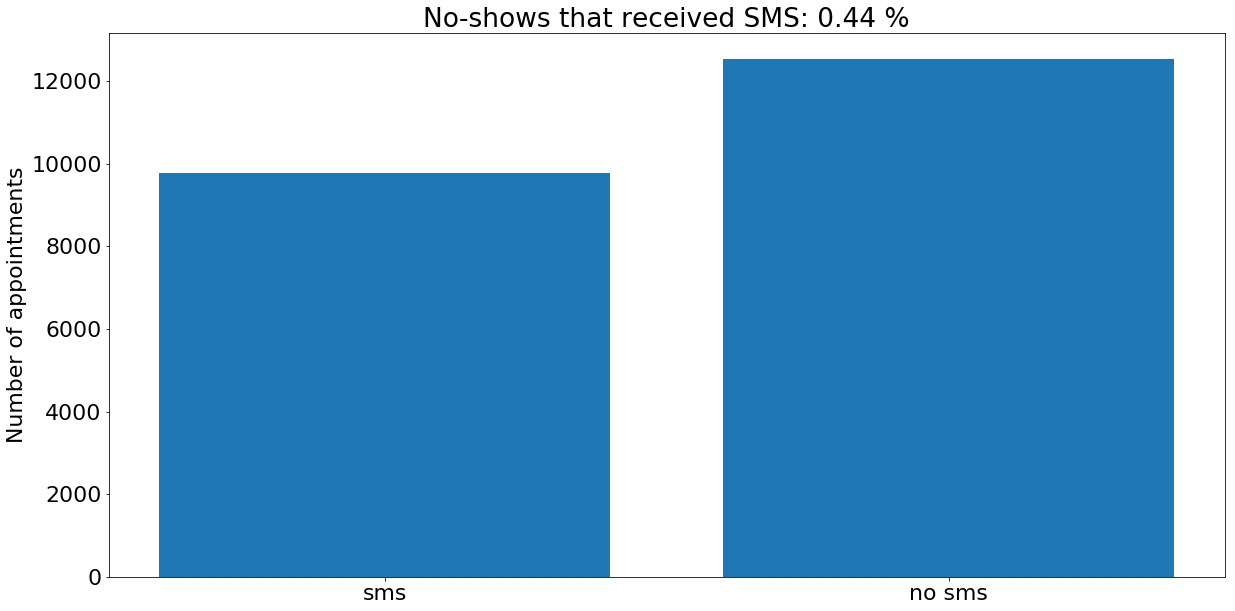

In [279]:
sms_received = len(missed.query("SMS_received == 1"))
sms_not_received = len(missed.query("SMS_received == 0"))

plt.bar([1,2],[sms_received, sms_not_received]);
plt.xticks([1,2], ["sms", "no sms"]);
plt.title("No-shows that received SMS: {0:.2f} %".format(sms_received/(sms_received + sms_not_received)));
plt.ylabel("Number of appointments");

The difference between those that received SMS and did not receive SMS is not as great as I expected. A large portion of missed appointments, 44%, were sent out an SMS message. Let's take a look if perhaps SMS reminders had impact on attended appointments:

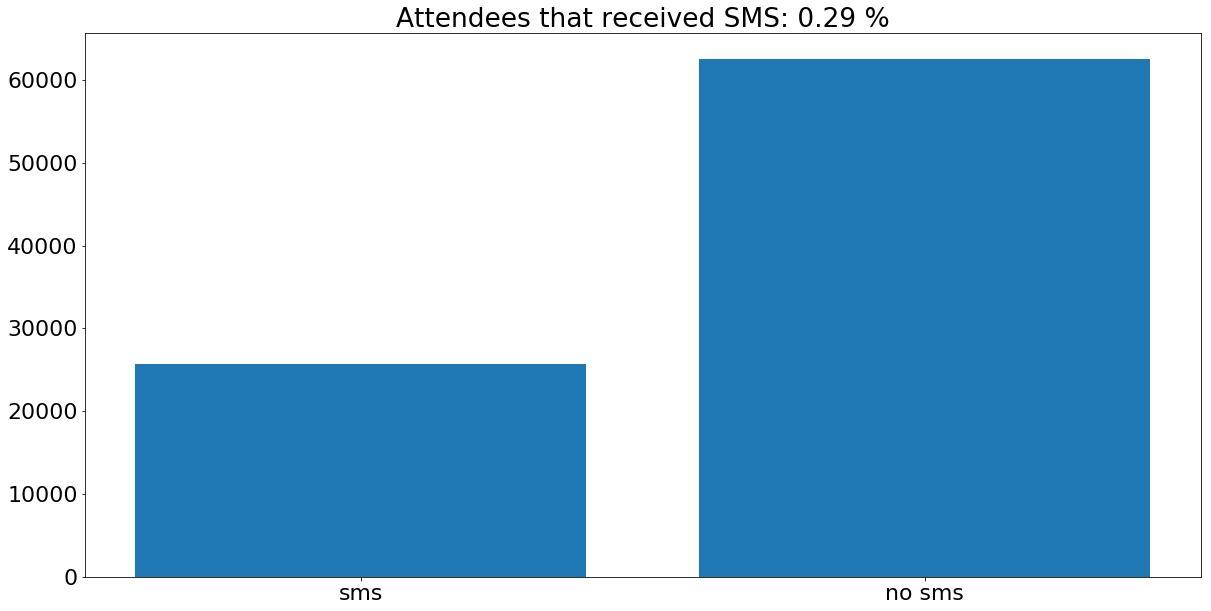

In [261]:
sms_received = attended.query("SMS_received == 1")["Gender"].count()
sms_not_received = attended.query("SMS_received == 0")["Gender"].count()
plt.bar([1,2],[sms_received, sms_not_received]);
plt.xticks([1,2], ["sms", "no sms"]);
plt.title("Attendees that received SMS: {0:.2f} %".format(sms_received/(sms_received + sms_not_received)));
plt.ylabel("Number of appointments");

Only 29% of those that attended received an SMS reminder. %71 of attended basically did not need the SMS reminder. This goes against what I thought that results will be in predicting if someone will attend the appointment.

### Impact of gender on missed appintments

Let's see if gender is somehow related to the appointment attendence. I would not expect there to be a relationship but worth investigating to see if there is one. 

Let's look at the missed appointments first, and see what the ratio looks like of females vs males:

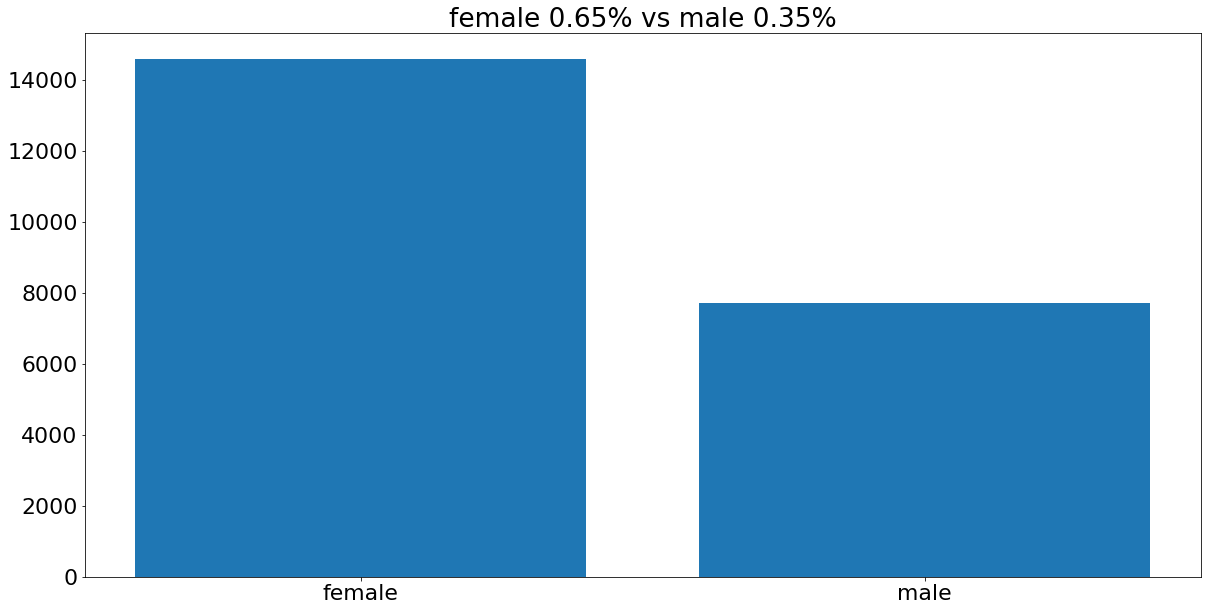

In [266]:
female = len(missed.query("Gender == 'F'"))
male = len(missed.query("Gender == 'M'"))

plt.bar([1,2],[female, male]);
plt.xticks([1,2], ["female", "male"]);
plt.title("female {0:.2f}% vs male {1:.2f}%".format(female/(female + male), male/(female+male)));
plt.ylabel("Number of appointments");

We see that there is almost 2 to 1 ratio between females and males. Let's see if that ratio holds up if we look at the attended appointments between the two groups:

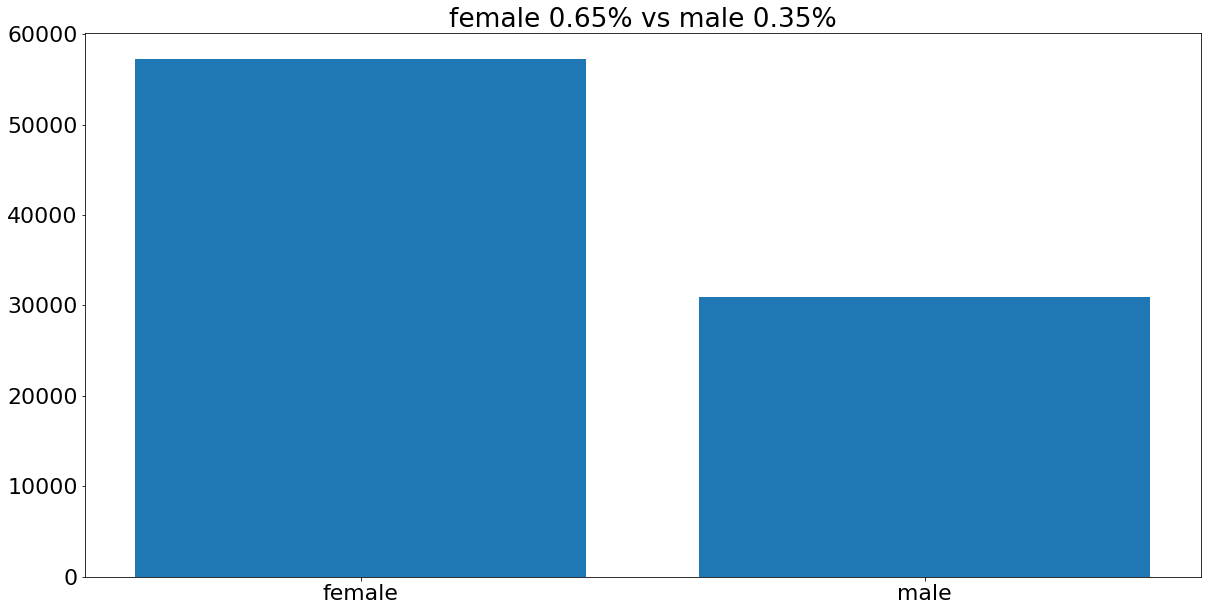

In [267]:
female = len(attended.query("Gender == 'F'"))
male = len(attended.query("Gender == 'M'"))

plt.bar([1,2],[female, male]);
plt.xticks([1,2], ["female", "male"]);
plt.title("female {0:.2f}% vs male {1:.2f}%".format(female/(female + male), male/(female+male)));
plt.ylabel("Number of appointments");

The ratio appears to be exactly the same, so it seems like gender has no relationship to the appointment no-shows.

### Impact of appointment scheduling and missed appointments

I am curious to see if there is a dependency between how long ago the appointment is made and the likelyhood of a missed appointments. We have two columns, when the appointment was made and the appointment day itself, that should help us answer that question.

First, I will split the data into two data sets, one will have all the appointments made within 3 days of the appointment and the second dataset will contain the rest. Three days are chosend based on the summary statistics that showed how 50% of the appointments fall within three day range:

In [268]:
short_lead = data.query("DayDiff <= 3")
short_lead.shape

(58527, 13)

In [269]:
long_lead = data.query("DayDiff > 3")
long_lead.shape

(51994, 13)

Let's check now what missed appointment counts looks like for both types of appointments:

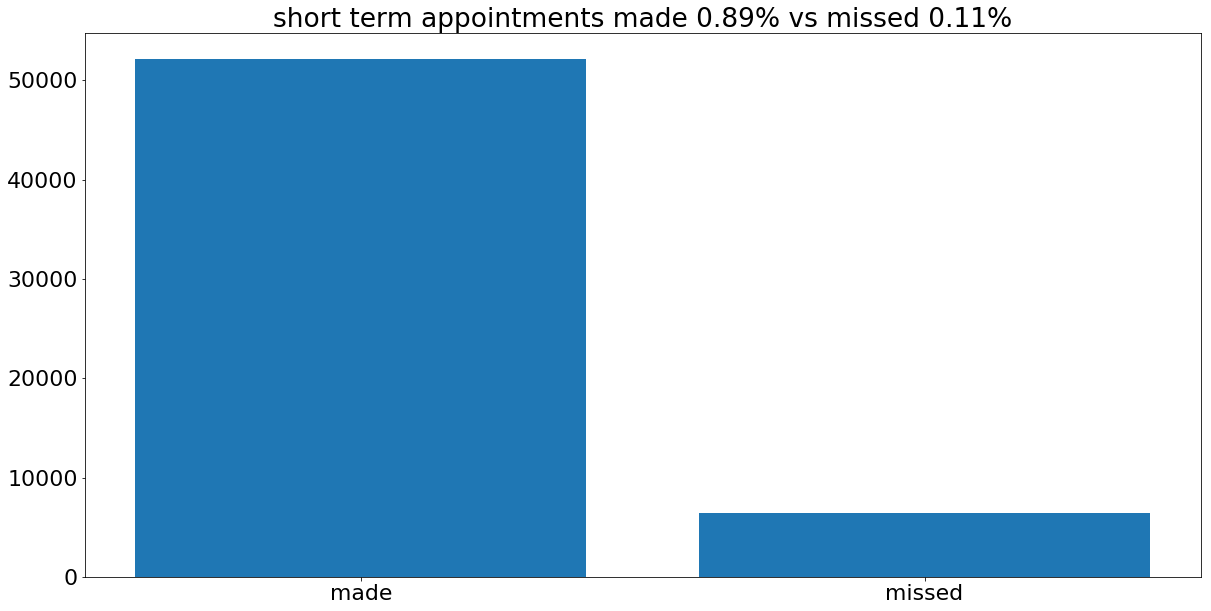

In [271]:
missed = len(short_lead[short_lead["No-show"] == "Yes"])
made = len(short_lead[short_lead["No-show"] == "No"])

plt.bar([1,2],[made, missed]);
plt.xticks([1,2], ["made", "missed"]);
plt.title("short term appointments made {0:.2f}% vs missed {1:.2f}%".format(made/(made + missed), missed/(made+missed)));
plt.ylabel("Number of appointments");

Interestingly, the difference is quite significant. It appears that the appointments that are made close to the appointment date are very likely to be attended.

Let's see what the attendence rates look like for long-term appointments:

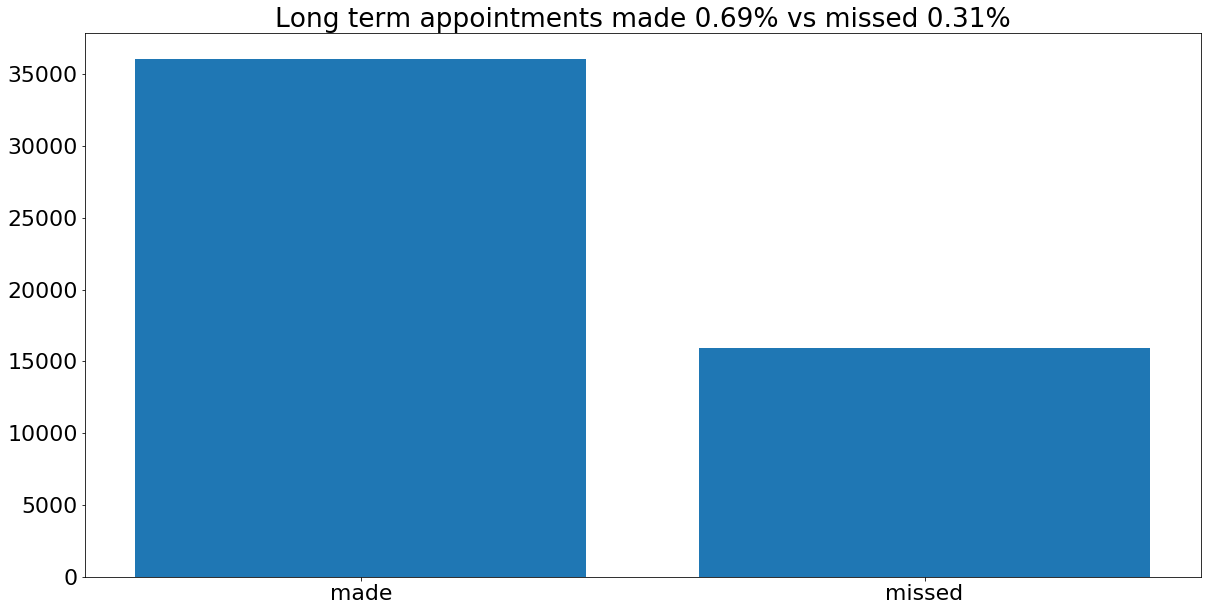

In [280]:
missed = len(long_lead[long_lead["No-show"] == "Yes"])
made = len(long_lead[long_lead["No-show"] == "No"])

plt.bar([1,2],[made, missed]);
plt.xticks([1,2], ["made", "missed"]);
plt.title("Long term appointments made {0:.2f}% vs missed {1:.2f}%".format(made/(made + missed), missed/(made+missed)));
plt.ylabel("Number of appointments");

The time between scheduling and the appointment itself is a big factor in determining if the person will be a no show. Over 15,000 missed appointment when the lead time is over three days compared to less than half of that (~6000) when the lead time is three or less days!

I was curious to see if the long-term appointment attendence was improved with SMS reminders. Earlier we determined that SMS reminders did not seem to make any impact to the attendence rate overall, but perhaps the long-term appointments saw an increase in attendence when SMS reminders were sent out.

Let's split long-term appointments further, by SMS_received values, and compare what the "no-show" counts look for each:

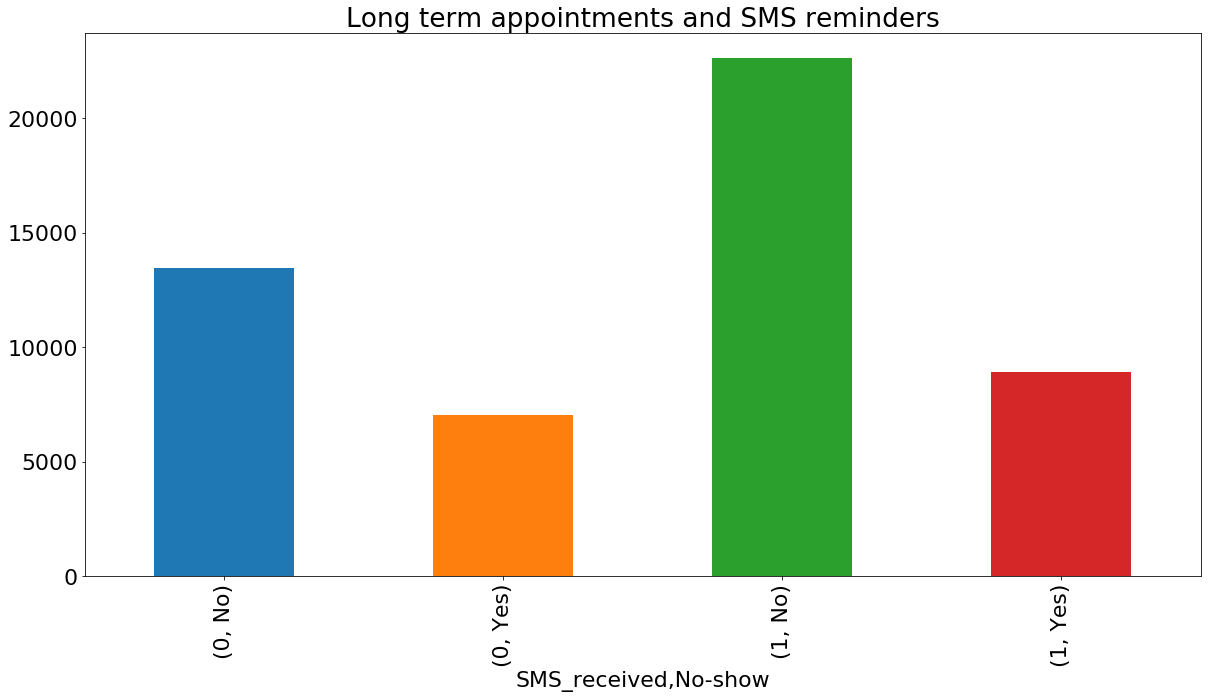

In [275]:
sms_vs_noshow = long_lead[["SMS_received", "No-show"]]

sms_vs_noshow.groupby("SMS_received")["No-show"].value_counts().plot(kind='bar');
plt.title("Long term appointments and SMS reminders");
plt.ylabel("Number of appointments");

If we look at the above chart, it seems like sending an SMS for longer term appointments makes a difference. The group that had a long term appointment and received an SMS was by the the largest out of the four groups in the splits.

<a id='conclusions'></a>
## Conclusions

In this notebook, I took a look at over one hundred thousand doctor appointment records in order to determine if there are certain patient factors that influence if the appointment will be attended or missed. My focus was on three featuresa and their influence on the attendence: SMS reminders, gender, and days passed between making the appointment and appointment date.

Initially, SMS reminders seemed to make no difference to the attendence rates. However they do appear to make an impact to the appointments that were made further in advance. It would make sense since the time between the appointment and scheduling could increase the chance of person forgetting the appointment.

Secondly, I took a look at the gender and checked if that factor made a difference in appointment attendences and there seemed to be no correlation between the attendences and gender.

Lastly, I analyzed the difference in attendence rates for appointments that were made with only three days or less until the appointment date and appointments that were further out. That seemed to have the largest impact to the attendence rates with close to 90% of appointments attended that were made with a few days ahead of time.

Although the data relationships explored above appeared to be strong, we can't be fully confident that factors such as SMS reminders and time between the making and appointment date are the determining factors in attendence rates. More data about the attendees would be needed to explore the reasons for misses and attendences. Factors such as proximity to the hospital could play a role and we have no way to confirm. Other factors such as the seriousness of the patience conditions could be in play too.